# **PREDIKSI HEART DISEASE**

Dalam project ini kita akan melakukan prediksi cuaca dengan dataset **seattle-weather**.

Link **dataset**:
https://drive.google.com/file/d/1IIyYZEQReb4VavO_piu3qQeGK6VcwGJm/view?usp=sharing

## **Data Preprocessing**

1. Isi _code-cell_ dibawah dengan kode untuk:
    - **membaca dataset** _seattle-weather_
    - **menampilkan 15** baris data teratas



In [344]:
# tulis jawaban anda pada code-cell berikut

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,BernoulliNB, MultinomialNB, ComplementNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [345]:
# tulis jawaban anda pada code-cell berikut

df = pd.read_csv("hungarian.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,251,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,?,?,?,1
290,54,0,3,130,294,0,1,100,1,0.0,2,?,?,1
291,56,1,4,155,342,1,0,150,1,3.0,2,?,?,1
292,58,0,2,180,393,0,0,110,1,1.0,2,?,7,1


In [346]:
# tulis jawaban anda pada code-cell berikut

df.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,251,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
5,32,0,2,105,198,0,0,165,0,0.0,?,?,?,0
6,32,1,2,110,225,0,0,184,0,0.0,?,?,?,0
7,32,1,2,125,254,0,0,155,0,0.0,?,?,?,0
8,33,1,3,120,298,0,0,185,0,0.0,?,?,?,0
9,34,0,2,130,161,0,0,190,0,0.0,?,?,?,0


2. Munculkan **informasi** dataset dan lakukan **cleaning data** yang dibutuhkan:
    - mengecek dan menghapus **nilai kosong**
    - menghapus (**_drop_**) kolom _"date"_
    - mengecek dan menghapus data yang memiliki **nilai duplikat**

In [347]:
# tulis jawaban anda pada code-cell berikut

print("Null value tiap kolom:")
print(df.isnull().sum())

Null value tiap kolom:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [348]:
# tulis jawaban anda pada code-cell berikut

df.drop(['slope','ca','thal'], axis=1, inplace=True)
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
2,29,1,2,140,251,0,0,170,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0


3. Diatas adalah contoh visualisasi menggunakan _diagram pie_,

    buatlah **visualisasi distribusi _target-class_** seperti diatas!

In [349]:
# tulis jawaban anda pada code-cell berikut

print("Distribusi Kelas Sakit Jantung :")
print(df['num'].value_counts())

Distribusi Kelas Sakit Jantung :
0    188
1    106
Name: num, dtype: int64


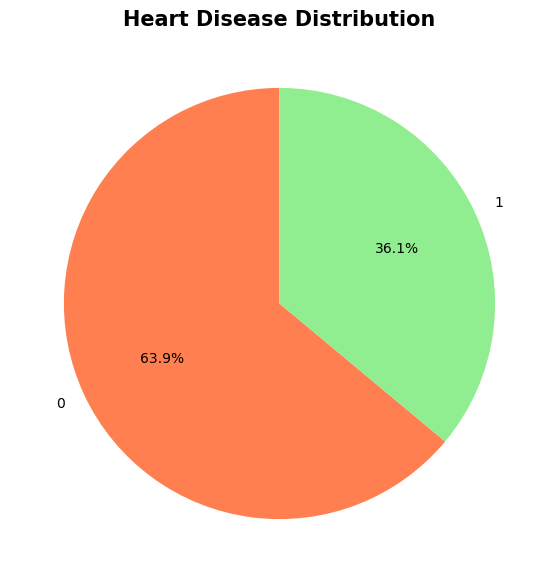

In [350]:
plt.figure(figsize=(7, 7))
plt.pie(df['num'].value_counts(), labels=df['num'].unique(), autopct='%1.1f%%', colors=['coral', 'lightgreen', 'yellow','lightblue','lightgrey'], startangle=90)
plt.title("Heart Disease Distribution", fontsize=15, fontweight="bold")
plt.show()

4. Anda akan melakukan **visualisasi relasi antar fitur** menggunakan _diagram scatter_.

    Perbaiki kata **'fix_me'** pada _code-cell_ dibawah!

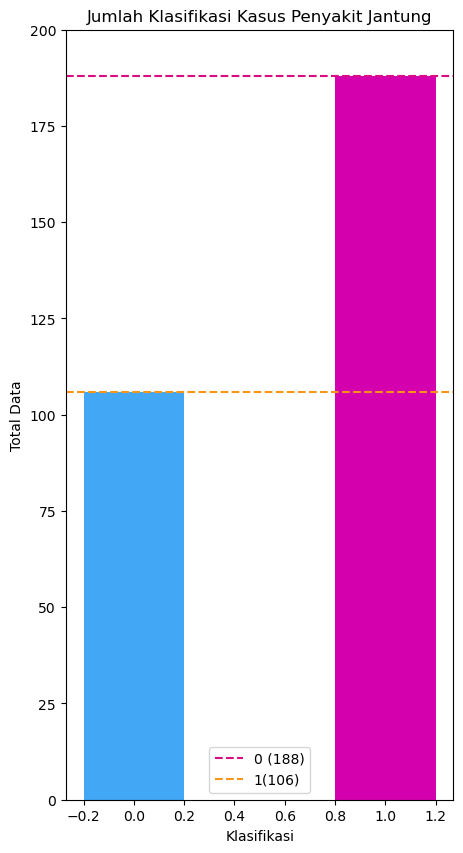

In [351]:
labels=df['num'].unique()
values=df['num'].value_counts(ascending=True)


fig, ax0 = plt.subplots(figsize=(5,10))
bar = ax0.bar(x=labels, height=values, width=0.4, align='center', color=['#42a7f5','#d400ad'])
ax0.set(title='Jumlah Klasifikasi Kasus Penyakit Jantung',xlabel='Klasifikasi', ylabel='Total Data')
ax0.set_ylim(0,200)
ax0.axhline(y=df['num'].value_counts()[0], color='#DA0C81', linestyle='--', label=f'0 ({df.num.value_counts()[0]})')
ax0.axhline(y=df['num'].value_counts()[1], color='#F99417', linestyle='--', label=f'1({df.num.value_counts()[1]})')
ax0.legend()

plt.show()

In [352]:
df = pd.read_csv("afterdrop.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    int64  
 2   cp        294 non-null    int64  
 3   trestbps  294 non-null    int64  
 4   chol      294 non-null    int64  
 5   fbs       294 non-null    int64  
 6   restecg   294 non-null    int64  
 7   thalach   294 non-null    int64  
 8   exang     294 non-null    int64  
 9   oldpeak   294 non-null    float64
 10  num       294 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 25.4 KB


## **Modelling**

5. **Bagi dataset** menjadi _train-set_ dan _test-set_ dengan ketentuan sebagai berikut:

    a. X = seluruh kolom fitur kecuali kolom target

    b. y = kolom target
    
    c. Bagi dengan rasio 70% _train-set_ dan 30% _test-set_

In [353]:
# tulis jawaban anda pada code-cell berikut

X = df.iloc[:, :-1]
y = df['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

6. **Perbaiki kata 'fix_me'** pada _code-cell_ dibawah untuk **menampilkan visualisasi rasio _target-class_** pada _train-set_ dan _test-set_!

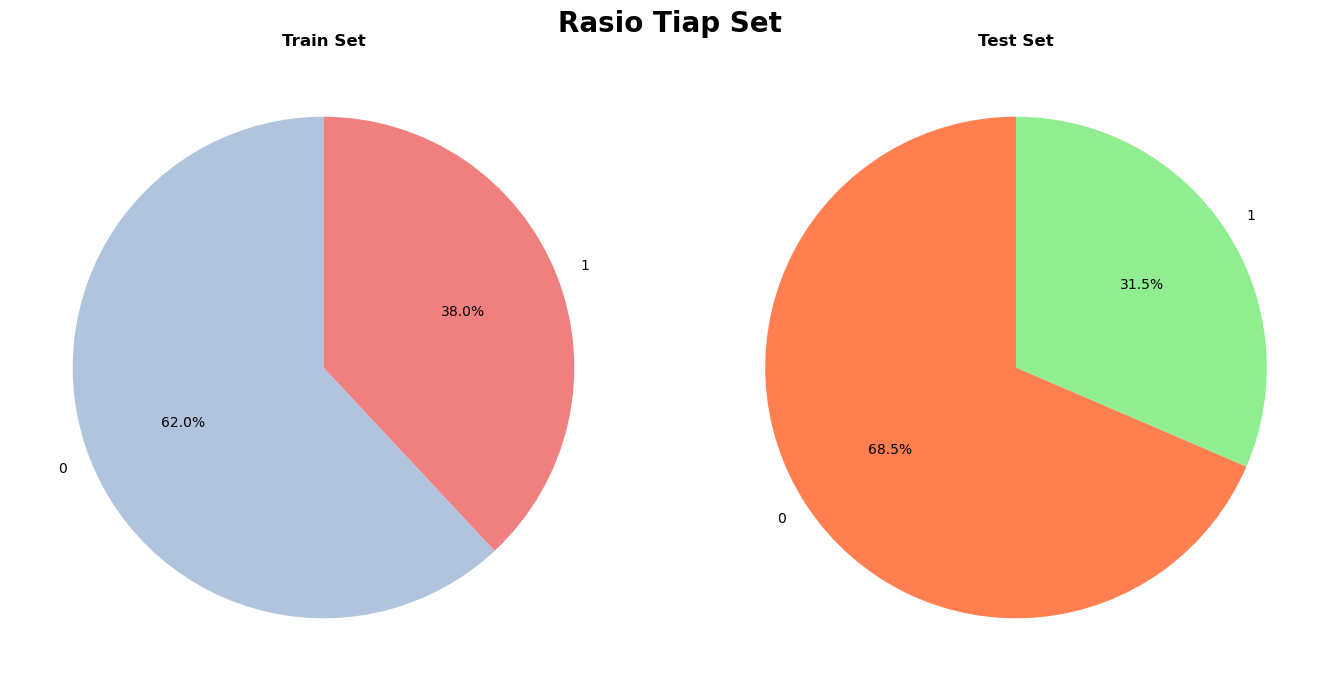

In [354]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
target_names = df['num'].unique()
colors1 = ['lightsteelblue', 'lightcoral']
colors2 = ['coral', 'lightgreen']

#Train dataset
axs[0].pie(y_train.value_counts(), labels=target_names, colors=colors1, autopct='%1.1f%%', startangle=90)
axs[0].set_title("Train Set", fontweight="bold")

#Test dataset
axs[1].pie(y_test.value_counts(), labels=target_names, colors=colors2, autopct='%1.1f%%', startangle=90)
axs[1].set_title("Test Set", fontweight="bold")

fig = fig.suptitle("Rasio Tiap Set", fontsize=20, fontweight="bold")
plt.tight_layout()

7.  Buatlah model dengan salah satu algoritma klasifikasi lalu latih dan prediksi dataset!

In [355]:
# tulis jawaban anda pada code-cell berikut

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [356]:
df.iloc[1]

age          29.0
sex           1.0
cp            2.0
trestbps    120.0
chol        243.0
fbs           0.0
restecg       0.0
thalach     160.0
exang         0.0
oldpeak       0.0
num           0.0
Name: 1, dtype: float64

## **Evaluasi**

8. Munculkan akurasi yang dihasilkan dari model yang anda gunakan.

In [357]:
# Lakukan evaluasi model

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.6966292134831461
Precision: 0.6937564603385553
Recall: 0.6966292134831461
F1 Score: 0.6951045118214205


In [358]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_predict = nb.predict(X_test)

nb_acc_score = accuracy_score(y_test, nb_predict)
precision = precision_score(y_test, nb_predict, average='weighted')
recall = recall_score(y_test, nb_predict, average='weighted')
f1 = f1_score(y_test, nb_predict, average='weighted')

print(f'naive bayes : {nb_acc_score}')
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

naive bayes : 0.797752808988764
Precision: 0.821732268626481
Recall: 0.797752808988764
F1 Score: 0.8032968657599053


In [359]:
nb_b = BernoulliNB()
nb_b.fit(X_train, y_train)
nb_b_predict = nb_b.predict(X_test)

nb_b_score = accuracy_score(y_test, nb_b_predict)
precision = precision_score(y_test, nb_b_predict, average='weighted')
recall = recall_score(y_test, nb_b_predict, average='weighted')
f1 = f1_score(y_test, nb_b_predict, average='weighted')

print(f'bernoulli : {nb_b_score}')
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

bernoulli : 0.7865168539325843
Precision: 0.7938283486020671
Recall: 0.7865168539325843
F1 Score: 0.7892534275184078


In [360]:
nb_m = MultinomialNB()
nb_m.fit(X_train, y_train)
nb_m_predict = nb_m.predict(X_test)

nb_m_score = accuracy_score(y_test, nb_m_predict)
precision = precision_score(y_test, nb_m_predict, average='weighted')
recall = recall_score(y_test, nb_m_predict, average='weighted')
f1 = f1_score(y_test, nb_m_predict, average='weighted')

print(f'multinomial : {nb_m_score}')
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

multinomial : 0.7752808988764045
Precision: 0.8086177108335943
Recall: 0.7752808988764045
F1 Score: 0.7822729704752177


In [361]:
nb_c = ComplementNB()
nb_c.fit(X_train, y_train)
nb_c_predict = nb_c.predict(X_test)

nb_c_score = accuracy_score(y_test, nb_c_predict)
precision = precision_score(y_test, nb_c_predict, average='weighted')
recall = recall_score(y_test, nb_c_predict, average='weighted')
f1 = f1_score(y_test, nb_c_predict, average='weighted')

print(f'complementary : {nb_c_score}')
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

complementary : 0.7865168539325843
Precision: 0.8241659464131375
Recall: 0.7865168539325843
F1 Score: 0.7934635960797289


In [362]:
# create an SVM model and train it on the training data
model = svm.SVC(kernel="linear", C=5)
model.fit(X_train, y_train)

# evaluate the model on the test data
accuracy = model.score(X_test, y_test)

print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.83


## **Esai**

9. Berikan kesimpulan dari project yang telah anda buat.

_Tulis **jawaban** no. 9 disini_

Untuk klasifikasi kali ini menggunakan algoritma KNN,dengan target class berjumlah 5,menghasilkan akurasi sebesar 74% dengan mayoritas cuaca cerah dan hujan

10. Upload dan lampirkan link
    - **Video** penjelasan berdurasi 10-15 menit mengenai project anda.
    - **Repository Github** berisi file notebook (_.ipynb_) anda.

In [363]:
link_video = "https://drive.google.com/file/d/1gxhcxfaDoQ-K8-Fc4_mt8Sb7vAXmCPTM/view?usp=drive_link"
link_github = "https://github.com/isNothingSpecial/UTSBKD"